# network for time histogram

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import imageio
import glob

In [4]:
i = 0
for frame in glob.glob("/mnt/Storage/gvicentini/electron_time/*.npy"):
    #frame = None
    i +=1
print(i)

99985


# input with this shape

In [33]:
frame = "/mnt/Storage/gvicentini/electron_time/0el_time0.npy"
arr = np.load(frame)
arr = np.reshape(arr, (20,1))
arr

array([[446.],
       [489.],
       [466.],
       [415.],
       [368.],
       [318.],
       [299.],
       [253.],
       [220.],
       [224.],
       [144.],
       [ 90.],
       [ 77.],
       [ 50.],
       [ 46.],
       [ 25.],
       [ 25.],
       [ 15.],
       [  5.],
       [  0.]])

In [10]:
i = 0
labels = np.zeros(199985)
powers = np.empty((199985, 20, 1), dtype=np.float64)
for frame in glob.glob("/mnt/Storage/gvicentini/positron_time/*.npy"):
    spec = np.load(frame)
    spec = np.reshape(spec, (20,1))
    powers[i] = spec
    i += 1
for frame in glob.glob("/mnt/Storage/gvicentini/electron_time/*.npy"):
    spec = np.load(frame) 
    spec = np.reshape(spec, (20,1))
    powers[i] = spec
    labels[i] = 1.0
    i += 1

In [17]:
powers = powers/powers.max()

In [19]:
powers.shape

(199985, 20, 1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(powers , labels ,test_size=0.2)

# build the model

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_uniform',  input_shape=(20, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 20, 32)            128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               41088     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 41,345
Trainable params: 41,345
Non-trainable params: 0
__________________________________________________

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training

In [28]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Train on 159988 samples, validate on 39997 samples
Epoch 1/10
159988/159988 [==============================] - 10s 65us/step - loss: 7.6723 - accuracy: 0.4996 - val_loss: 7.6050 - val_accuracy: 0.5013
Epoch 2/10
159988/159988 [==============================] - 11s 66us/step - loss: 7.6723 - accuracy: 0.4996 - val_loss: 7.6050 - val_accuracy: 0.5013
Epoch 3/10
159988/159988 [==============================] - 10s 63us/step - loss: 7.6723 - accuracy: 0.4996 - val_loss: 7.6050 - val_accuracy: 0.5013
Epoch 4/10
159988/159988 [==============================] - 10s 65us/step - loss: 7.6723 - accuracy: 0.4996 - val_loss: 7.6050 - val_accuracy: 0.5013
Epoch 5/10
159988/159988 [==============================] - 11s 66us/step - loss: 7.6723 - accuracy: 0.4996 - val_loss: 7.6050 - val_accuracy: 0.5013
Epoch 6/10
159988/159988 [==============================] - 10s 65us/step - loss: 7.6723 - accuracy: 0.4996 - val_loss: 7.6050 - val_accuracy: 0.5013
Epoch 7/10
159988/159988 [=======================

# no good results

In [29]:
acc = model.evaluate(X_test, Y_test)
print((acc[1] * 100.0))

39997/39997 [==============================] - 1s 24us/step
50.1287579536438


In [30]:
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

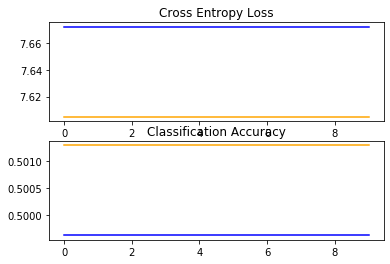

In [32]:
summarize_diagnostics(history)

# try with a more deep one

In [37]:
model1 = Sequential()
model1.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model1.add(MaxPooling1D(2))
model1.add(Dropout(0.2))
model1.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling1D(2))
model1.add(Dropout(0.2))
model1.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling1D(2))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))

In [38]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 20, 32)            128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 10, 64)            6208      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 64)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 5, 128)           

In [39]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
history1 = model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Train on 159988 samples, validate on 39997 samples
Epoch 1/10
159988/159988 [==============================] - 22s 140us/step - loss: 0.3901 - accuracy: 0.7628 - val_loss: 0.0400 - val_accuracy: 0.9966
Epoch 2/10
159988/159988 [==============================] - 21s 132us/step - loss: 0.1120 - accuracy: 0.9592 - val_loss: 0.0489 - val_accuracy: 0.9654
Epoch 3/10
159988/159988 [==============================] - 21s 133us/step - loss: 0.1238 - accuracy: 0.9554 - val_loss: 0.0425 - val_accuracy: 0.9821
Epoch 4/10
159988/159988 [==============================] - 22s 135us/step - loss: 0.1296 - accuracy: 0.9560 - val_loss: 0.0222 - val_accuracy: 0.9993
Epoch 5/10
159988/159988 [==============================] - 21s 134us/step - loss: 0.1288 - accuracy: 0.9551 - val_loss: 0.0396 - val_accuracy: 0.9877
Epoch 6/10
159988/159988 [==============================] - 22s 139us/step - loss: 0.2247 - accuracy: 0.9084 - val_loss: 0.1906 - val_accuracy: 0.9180
Epoch 7/10
159988/159988 [=================

# not so bad results

In [41]:
acc1 = model1.evaluate(X_test, Y_test)
print((acc1[1] * 100.0))

39997/39997 [==============================] - 2s 52us/step
73.95804524421692


# but the evalution functions show a strange trend

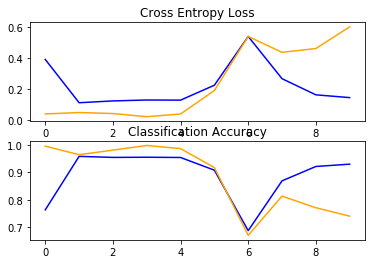

In [42]:
summarize_diagnostics(history1)

# try with more epochs

In [43]:
history1_1 = model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Train on 159988 samples, validate on 39997 samples
Epoch 1/100
159988/159988 [==============================] - 20s 126us/step - loss: 0.1725 - accuracy: 0.9035 - val_loss: 0.7167 - val_accuracy: 0.8192
Epoch 2/100
159988/159988 [==============================] - 21s 133us/step - loss: 0.2048 - accuracy: 0.8771 - val_loss: 0.1427 - val_accuracy: 0.9065
Epoch 3/100
159988/159988 [==============================] - 21s 134us/step - loss: 0.2036 - accuracy: 0.8765 - val_loss: 0.6133 - val_accuracy: 0.8032
Epoch 4/100
159988/159988 [==============================] - 21s 132us/step - loss: 0.2082 - accuracy: 0.8753 - val_loss: 0.3492 - val_accuracy: 0.8815
Epoch 5/100
159988/159988 [==============================] - 22s 137us/step - loss: 0.1949 - accuracy: 0.8832 - val_loss: 0.2662 - val_accuracy: 0.8576
Epoch 6/100
159988/159988 [==============================] - 22s 140us/step - loss: 0.1936 - accuracy: 0.8849 - val_loss: 0.1389 - val_accuracy: 0.9396
Epoch 7/100
159988/159988 [==========

In [44]:
acc1_1 = model1.evaluate(X_test, Y_test)

39997/39997 [==============================] - 2s 41us/step
73.95804524421692


# 90% of accuracy (?)

In [65]:
print((acc1_1[1] * 100.0))

89.44670557975769


# but there is a problem of oscillation (to be fix)

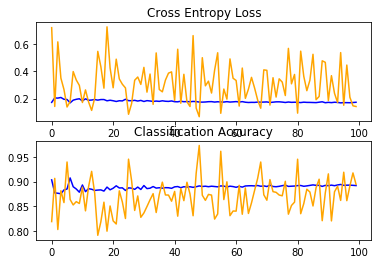

In [45]:
summarize_diagnostics(history1_1)

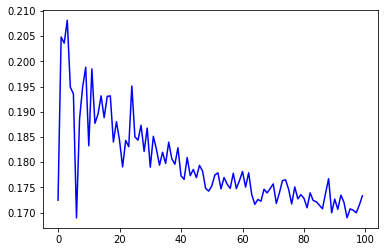

In [56]:
 plt.plot(history1_1.history['loss'], color='blue', label='train')

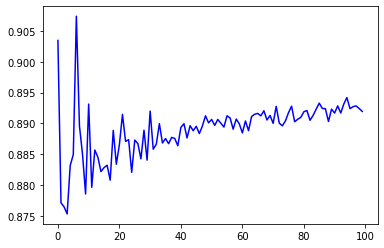

In [57]:
plt.plot(history1_1.history['accuracy'], color='blue', label='train')

# reduce learning_rate = 0.0001 and increase batch_size=64

In [84]:
model4 = Sequential()
model4.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model4.add(MaxPooling1D(2))
model4.add(Dropout(0.2))
model4.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling1D(2))
model4.add(Dropout(0.2))
model4.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling1D(2))
model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

In [85]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [86]:
history4 = model4.fit(X_train, Y_train, batch_size=64, validation_data=(X_test, Y_test), epochs=20)

Train on 159988 samples, validate on 39997 samples
Epoch 1/20
159988/159988 [==============================] - 18s 115us/step - loss: 0.6926 - accuracy: 0.5257 - val_loss: 0.6827 - val_accuracy: 0.5650
Epoch 2/20
159988/159988 [==============================] - 17s 104us/step - loss: 0.6783 - accuracy: 0.5591 - val_loss: 0.6545 - val_accuracy: 0.5692
Epoch 3/20
159988/159988 [==============================] - 18s 110us/step - loss: 0.6259 - accuracy: 0.6408 - val_loss: 0.4167 - val_accuracy: 0.8982
Epoch 4/20
159988/159988 [==============================] - 17s 106us/step - loss: 0.4485 - accuracy: 0.7917 - val_loss: 0.1647 - val_accuracy: 0.9904
Epoch 5/20
159988/159988 [==============================] - 17s 108us/step - loss: 0.2370 - accuracy: 0.9057 - val_loss: 0.0654 - val_accuracy: 0.9960
Epoch 6/20
159988/159988 [==============================] - 17s 106us/step - loss: 0.1227 - accuracy: 0.9552 - val_loss: 0.0345 - val_accuracy: 0.9976
Epoch 7/20
159988/159988 [=================

In [87]:
acc4 = model4.evaluate(X_test, Y_test)
print((acc4[1] * 100.0))

39997/39997 [==============================] - 2s 48us/step
99.59747195243835


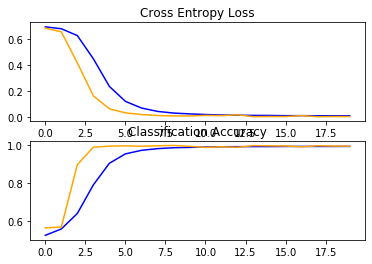

In [88]:
summarize_diagnostics(history4)

# change optimizer = Adagrad and batch_size=1024

In [60]:
model1.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

In [61]:
history1_3 = model1.fit(X_train, Y_train, batch_size=1024, validation_data=(X_test, Y_test), epochs=100)

Train on 159988 samples, validate on 39997 samples
Epoch 1/100
159988/159988 [==============================] - 7s 47us/step - loss: 0.6669 - accuracy: 0.5542 - val_loss: 0.6941 - val_accuracy: 0.5013
Epoch 2/100
159988/159988 [==============================] - 7s 46us/step - loss: 0.6579 - accuracy: 0.5629 - val_loss: 0.6948 - val_accuracy: 0.5013
Epoch 3/100
159988/159988 [==============================] - 7s 45us/step - loss: 0.6550 - accuracy: 0.5649 - val_loss: 0.6950 - val_accuracy: 0.5013
Epoch 4/100
159988/159988 [==============================] - 7s 46us/step - loss: 0.6537 - accuracy: 0.5656 - val_loss: 0.6949 - val_accuracy: 0.5013
Epoch 5/100
159988/159988 [==============================] - 7s 46us/step - loss: 0.6524 - accuracy: 0.5678 - val_loss: 0.6950 - val_accuracy: 0.5013
Epoch 6/100
159988/159988 [==============================] - 7s 44us/step - loss: 0.6521 - accuracy: 0.5676 - val_loss: 0.6952 - val_accuracy: 0.5013
Epoch 7/100
159988/159988 [======================

In [66]:
acc1_3 = model1.evaluate(X_test, Y_test)
print((acc1_3[1] * 100.0))

39997/39997 [==============================] - 2s 46us/step
59.08192992210388


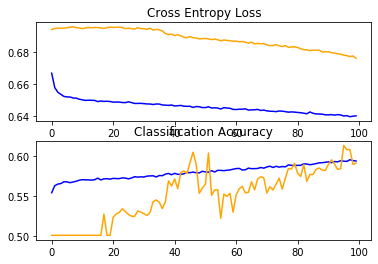

In [64]:
summarize_diagnostics(history1_3)

# change optimizer=SGD and batch_size=512

In [68]:
model1.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [69]:
history1_4 = model1.fit(X_train, Y_train, batch_size=512, validation_data=(X_test, Y_test), epochs=100)

Train on 159988 samples, validate on 39997 samples
Epoch 1/100
159988/159988 [==============================] - 8s 52us/step - loss: 0.6955 - accuracy: 0.4998 - val_loss: 0.6940 - val_accuracy: 0.5013
Epoch 2/100
159988/159988 [==============================] - 8s 49us/step - loss: 0.6937 - accuracy: 0.4993 - val_loss: 0.6933 - val_accuracy: 0.5013
Epoch 3/100
159988/159988 [==============================] - 8s 50us/step - loss: 0.6933 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.5013
Epoch 4/100
159988/159988 [==============================] - 7s 46us/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 5/100
159988/159988 [==============================] - 8s 49us/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 6/100
159988/159988 [==============================] - 8s 48us/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 7/100
159988/159988 [======================

In [70]:
acc1_4 = model1.evaluate(X_test, Y_test)
print((acc1_4[1] * 100.0))

39997/39997 [==============================] - 2s 45us/step
49.87123906612396


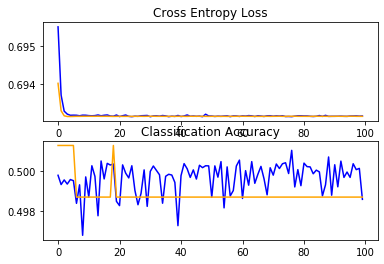

In [71]:
summarize_diagnostics(history1_4)

# batch_size=512

In [47]:
history1_2 = model1.fit(X_train, Y_train, batch_size=512, validation_data=(X_test, Y_test), epochs=100)

Train on 159988 samples, validate on 39997 samples
Epoch 1/100
159988/159988 [==============================] - 8s 53us/step - loss: 0.1535 - accuracy: 0.9012 - val_loss: 0.2504 - val_accuracy: 0.9062
Epoch 2/100
159988/159988 [==============================] - 8s 49us/step - loss: 0.1502 - accuracy: 0.9026 - val_loss: 0.2518 - val_accuracy: 0.9149
Epoch 3/100
159988/159988 [==============================] - 8s 49us/step - loss: 0.1502 - accuracy: 0.9031 - val_loss: 0.2270 - val_accuracy: 0.9151
Epoch 4/100
159988/159988 [==============================] - 8s 50us/step - loss: 0.1498 - accuracy: 0.9029 - val_loss: 0.1841 - val_accuracy: 0.9214
Epoch 5/100
159988/159988 [==============================] - 7s 44us/step - loss: 0.1484 - accuracy: 0.9032 - val_loss: 0.2098 - val_accuracy: 0.9262
Epoch 6/100
159988/159988 [==============================] - 7s 44us/step - loss: 0.1496 - accuracy: 0.9023 - val_loss: 0.2539 - val_accuracy: 0.9214
Epoch 7/100
159988/159988 [======================

In [48]:
acc1_2 = model1.evaluate(X_test, Y_test)

39997/39997 [==============================] - 2s 41us/step
73.95804524421692


In [72]:
print((acc1_2[1] * 100.0))

92.73945689201355


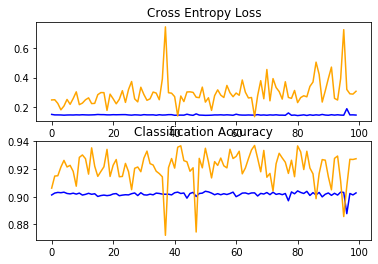

In [49]:
summarize_diagnostics(history1_2)

# more deep and batch_size=1024

In [50]:
model2 = Sequential()
model2.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.2))
model2.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.2))
model2.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(Conv1D(256, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [51]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
history2 = model1.fit(X_train, Y_train, batch_size=1024, validation_data=(X_test, Y_test), epochs=100)

Train on 159988 samples, validate on 39997 samples
Epoch 1/100
159988/159988 [==============================] - 7s 45us/step - loss: 0.1458 - accuracy: 0.9040 - val_loss: 0.3516 - val_accuracy: 0.9220
Epoch 2/100
159988/159988 [==============================] - 7s 46us/step - loss: 0.1459 - accuracy: 0.9037 - val_loss: 0.2833 - val_accuracy: 0.9286
Epoch 3/100
159988/159988 [==============================] - 7s 45us/step - loss: 0.1451 - accuracy: 0.9039 - val_loss: 0.3168 - val_accuracy: 0.9324
Epoch 4/100
159988/159988 [==============================] - 7s 45us/step - loss: 0.1457 - accuracy: 0.9036 - val_loss: 0.3230 - val_accuracy: 0.9231
Epoch 5/100
159988/159988 [==============================] - 7s 45us/step - loss: 0.1473 - accuracy: 0.9035 - val_loss: 0.3071 - val_accuracy: 0.9259
Epoch 6/100
159988/159988 [==============================] - 7s 43us/step - loss: 0.1452 - accuracy: 0.9046 - val_loss: 0.3075 - val_accuracy: 0.9250
Epoch 7/100
159988/159988 [======================

In [53]:
acc2 = model2.evaluate(X_test, Y_test)

39997/39997 [==============================] - 2s 60us/step
73.95804524421692


In [73]:
print((acc2[1] * 100.0))

50.1287579536438


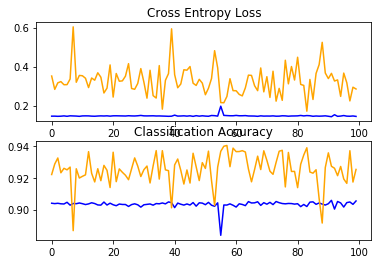

In [55]:
summarize_diagnostics(history2)

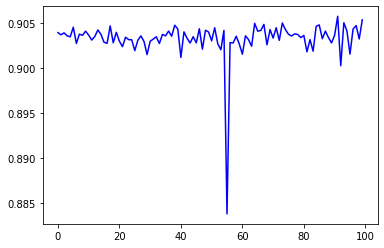

In [58]:
plt.plot(history2.history['accuracy'], color='blue', label='train')